In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Importing Data

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)
df = pd.read_excel(r'C:\Users\HP\Downloads\CHURNDATA (1).xlsx')
df.head()

,CIF,CUS_DOB,AGE,CUS_Month_Income,CUS_Gender,CUS_Marital_Status,CUS_Customer_Since,YEARS_WITH_US,# total debit transactions for S1,# total debit transactions for S2,# total debit transactions for S3,total debit amount for S1,total debit amount for S2,total debit amount for S3,# total credit transactions for S1,# total credit transactions for S2,# total credit transactions for S3,total credit amount for S1,total credit amount for S2,total credit amount for S3,total debit amount,total debit transactions,total credit amount,total credit transactions,total transactions,CUS_Target,TAR_Desc,Status
0,XXXXXX,Feb 13 1970 12:00AM,49,7116.64,MALE,MARRIED,1994-06-30,25,277,265,345,1459126.64,1230543.08,2068641.91,10,24,31,1516981.10,1764079.61,2378592.62,4758311.63,887,5659653.33,65,952,2231,EXECUTIVE,ACTIVE
1,XXXXXX,Sep 20 1973 12:00AM,46,1500000.00,FEMALE,SINGLE,2005-05-19,14,37,15,45,35372.55,20134.00,83856.67,2,4,4,10000.00,19500.00,57500.00,139363.22,97,87000.00,10,107,2223,LOW,ACTIVE
2,XXXXXX,Jul 18 1966 12:00AM,53,5000000.00,FEMALE,SINGLE,2005-05-20,14,31,14,8,28248.85,4777.66,4348.95,14,8,5,709625.00,240311.84,70946.86,37375.46,53,1020883.70,27,80,2222,MIDLE,ACTIVE
3,XXXXXX,Jan 9 2004 12:00AM,15,500.00,FEMALE,SINGLE,2005-05-20,14,0,1,0,0.00,4000.00,0.00,5,4,3,30103.05,28089.99,18753.92,4000.00,1,76946.96,12,13,2223,LOW,ACTIVE
4,XXXXXX,Mar 7 1971 12:00AM,48,9000000.00,FEMALE,SINGLE,2014-06-30,5,15,33,12,69083.38,223007.51,46379.40,8,7,6,195600.00,176000.00,70500.00,338470.29,60,442100.00,21,81,2223,LOW,ACTIVE


In [4]:
# Training_Model

from sklearn.impute import SimpleImputer , KNNImputer
knn  = KNNImputer()
simple_imputer = SimpleImputer(strategy='most_frequent')
df['CUS_Month_Income'] = knn.fit_transform(df[['CUS_Month_Income']])
df['CUS_Gender'] = simple_imputer.fit_transform(df[['CUS_Gender']])

In [5]:
# Deleting Row

del df['CIF']
del df['CUS_DOB']
del df['CUS_Customer_Since']
#del df['CUS_Target']

In [6]:
#Encoding_Data_cleaning 

le_cols = ['CUS_Gender', 'Status']
one_hot_cols  = ['CUS_Marital_Status']
ord_cols =['TAR_Desc']

#encoding
import numpy as np
def encoder(ordinal_cols =None , one_hot_cols = None,le_cols = None  , df=df):
    
    from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
    le = LabelEncoder()
    od = OrdinalEncoder()
    one_hot = OneHotEncoder(handle_unknown='ignore',sparse =False)
    if ordinal_cols:
        for x in ordinal_cols:
            df[x] = od.fit_transform(df[[x]])
        #print(od.categories_)
    if one_hot_cols:
        for x in one_hot_cols:
            data = one_hot.fit_transform(df[[x]])
            cols = np.array(one_hot.categories_)[0 ,:].tolist()


            enc_data = pd.DataFrame(data , columns = cols)
            del df[x]

            df = df.join(enc_data)
    if le_cols:
        for x in le_cols:
            df[x] = le.fit_transform(df[x])
            
    return df

df = encoder(one_hot_cols=one_hot_cols , le_cols=le_cols,df=df)

In [7]:
A = [2211 , 2230 , 2212,2231,2236,2224,2234,2235,2232]
cus_tar_list = list(df['CUS_Target'].unique())
C = []
for x in cus_tar_list:
    if x not in A:
        C.append(x)
C

[2223, 2222, 2233]

In [8]:
cus_tar_dict = {}
for x in cus_tar_list:
    if x in A:
        cus_tar_dict[x] = 0
        
    else:
        cus_tar_dict[x] = 1
cus_tar_dict
df['CUS_Target'] = df['CUS_Target'].map(cus_tar_dict)

In [9]:
# unique_values = ['EXECUTIVE', 'LOW', 'MIDLE', 'PLATINUM']
#from sklearn.preprocessing import OrdinalEncoder
df['TAR_Desc'] = df['TAR_Desc'].map({'LOW':0 , 'MIDLE':1,'EXECUTIVE':3,'PLATINUM':2})

In [10]:
#Splitting_Data

X = df.drop(['Status'],axis=1)
y = df['Status']

In [ ]:
# Resampling with SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state  =12)
X_resampled , y_resampled= smote.fit_resample(X,y)

In [12]:
fake_df = df.copy()

In [13]:
X_resampled = X_resampled.drop(['total debit amount', 'total debit transactions', 'total credit amount',
       'total credit transactions', 'total transactions'],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2,random_state=0)

In [15]:
# Model Training 
from sklearn.tree import DecisionTreeClassifier
dec_tree= DecisionTreeClassifier(max_depth =22 ,criterion='entropy',random_state=23)
dec_tree.fit(X_train ,y_train)
dec_tree.score(X_train , y_train)

1.0

In [16]:
y_pred_dec_tree = dec_tree.predict(X_test)

from sklearn.metrics import accuracy_score
print('test_accuracy :',accuracy_score(y_test, y_pred_dec_tree))

from sklearn.metrics import  classification_report ,confusion_matrix
print((classification_report(y_test,y_pred_dec_tree)) , confusion_matrix(y_test , y_pred_dec_tree))

test_accuracy : 0.8557457212713936
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       208
           1       0.85      0.86      0.85       201

    accuracy                           0.86       409
   macro avg       0.86      0.86      0.86       409
weighted avg       0.86      0.86      0.86       409
 [[178  30]
 [ 29 172]]


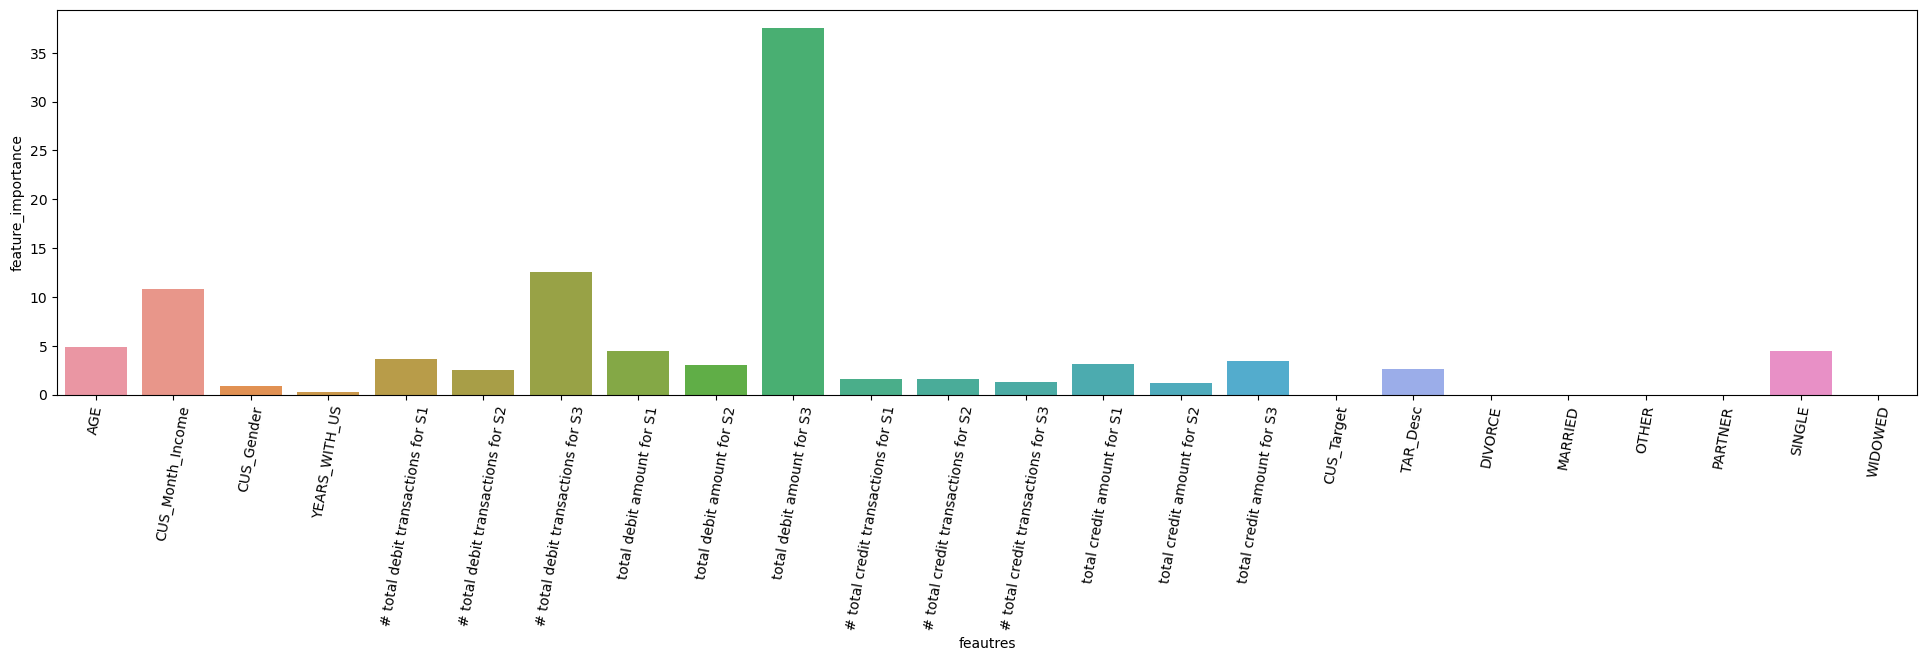

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
dec_tree_fea_importance = dec_tree.feature_importances_*100
plt.figure(figsize = (X_train.shape[1],5))
sns.barplot(x = X_train.columns ,y = list(dec_tree_fea_importance))
plt.xlabel("feautres")
plt.ylabel('feature_importance')
plt.xticks(rotation=80)
plt.show()

Text(0.5, 1.0, 'ROC and AUC')

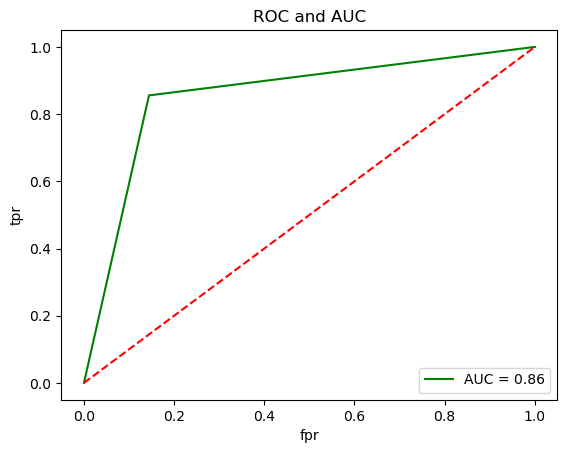

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score  ,auc
fpr , tpr  , threshold= roc_curve(y_test , y_pred_dec_tree)
roc_auc = auc(fpr ,tpr)
plt.plot(fpr , tpr,c='green',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1]  ,linestyle= '--'  ,c='red')
plt.legend(loc = 'lower right')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC and AUC")

In [19]:
X_train.drop(['CUS_Gender','PARTNER','WIDOWED','OTHER','DIVORCE','YEARS_WITH_US'],axis=1 , inplace =True)
X_test.drop(['CUS_Gender','PARTNER','WIDOWED','OTHER','DIVORCE','YEARS_WITH_US'],axis=1 , inplace =True)

In [20]:
dec_tree.tree_.max_depth

20

# --------------------------------------------------------------

## RandomForestClassifier


In [21]:
X_train.shape

(1635, 18)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight={0 :.4,1:.6},random_state=1)
rf.fit(X_train  , y_train)
print(rf.score(X_train,y_train))
print(accuracy_score(y_test,rf.predict(X_test)))
y_pred = rf.predict(X_test)
print(classification_report(y_test, rf.predict(X_test)))

1.0
0.9119804400977995
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       208
           1       0.91      0.91      0.91       201

    accuracy                           0.91       409
   macro avg       0.91      0.91      0.91       409
weighted avg       0.91      0.91      0.91       409



In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,rf.predict(X_test))

array([[191,  17],
       [ 19, 182]], dtype=int64)

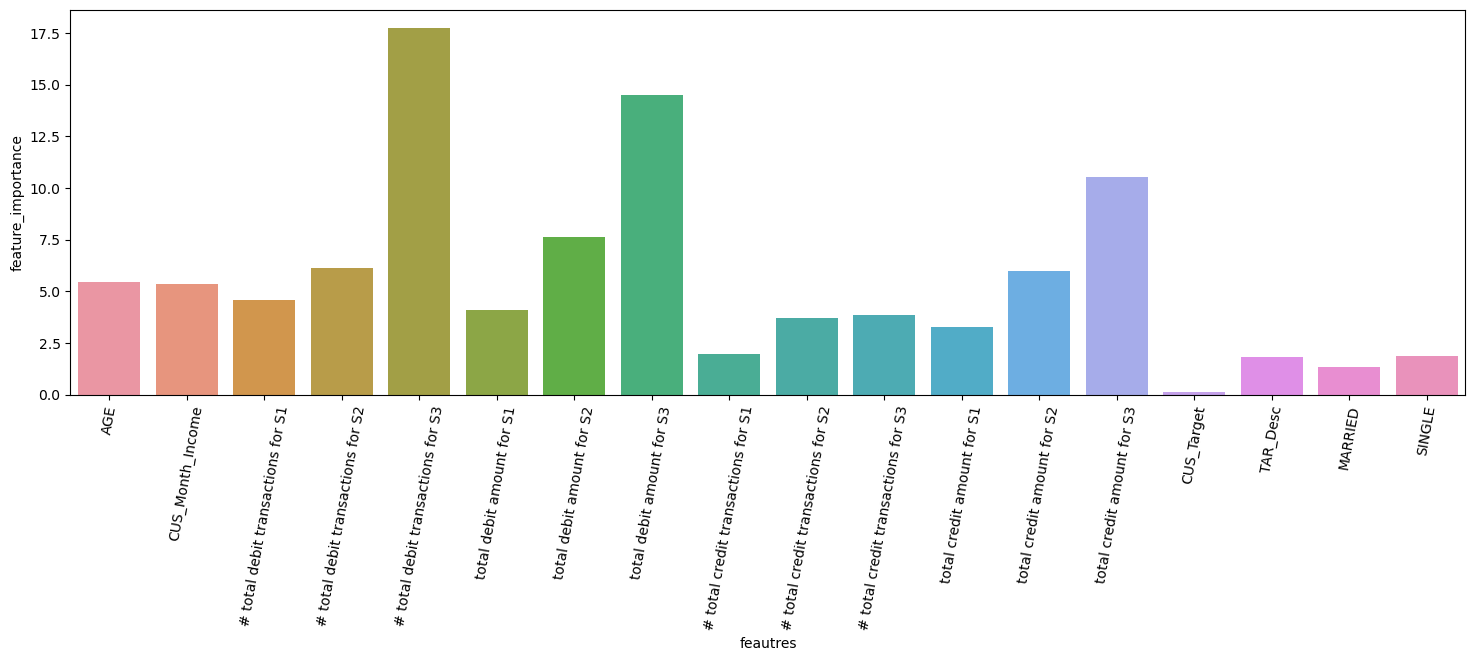

In [24]:
# Feature Analysis

rf_fea_importance = rf.feature_importances_*100
plt.figure(figsize = (X_train.shape[1],5))
sns.barplot(x = X_train.columns ,y = list(rf_fea_importance))
plt.xlabel("feautres")
plt.ylabel('feature_importance')
plt.xticks(rotation=80)
plt.show()

Text(0.5, 1.0, 'ROC and AUC')

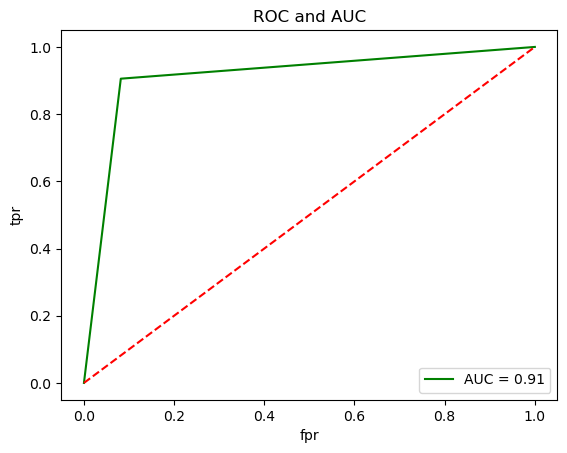

In [32]:
fpr , tpr  , threshold= roc_curve(y_test , rf.predict(X_test))
roc_auc = auc(fpr ,tpr)
plt.plot(fpr , tpr,c='green',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1]  ,linestyle= '--'  ,c='red')
plt.legend(loc = 'lower right')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC and AUC")

## GRIDSearcCV rf

In [25]:
#Tuning Hyperparameter using Grid_search_Cv

from sklearn.model_selection import GridSearchCV , StratifiedKFold
cv = StratifiedKFold(n_splits = 10)
params = [
    {'n_estimators':[40,60,80,100],
     'min_samples_split' : [1,2,3,4,5,6],
    'max_depth': [25,30,35,40] }
]
gd = GridSearchCV(RandomForestClassifier(),param_grid = params,scoring='accuracy')
gd.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [25, 30, 35, 40],
                          'min_samples_split': [1, 2, 3, 4, 5, 6],
                          'n_estimators': [40, 60, 80, 100]}],
             scoring='accuracy')

In [26]:
gd.best_params_

{'max_depth': 35, 'min_samples_split': 2, 'n_estimators': 80}

In [27]:
# Confusion_Metrix

y_pred_grid_rf = gd.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred_grid_rf))

print(classification_report(y_test, y_pred_grid_rf))

0.9144254278728606
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       208
           1       0.90      0.94      0.91       201

    accuracy                           0.91       409
   macro avg       0.91      0.91      0.91       409
weighted avg       0.92      0.91      0.91       409



In [28]:
confusion_matrix(y_test,y_pred_grid_rf)

array([[186,  22],
       [ 13, 188]], dtype=int64)

In [29]:
# F1_Score 

from sklearn.metrics import f1_score
predictions = [y_pred_dec_tree ,y_pred_grid_rf , rf.predict(X_test)]
models = ['decision_Tree' , 'grid_random_forest', 'random_forest']
print("F1_score")
for x ,y in zip(predictions , models):
    print(y , ': ',f1_score(y_test,x))

F1_score
decision_Tree :  0.8535980148883374
grid_random_forest :  0.9148418491484184
random_forest :  0.91


Text(0.5, 1.0, 'ROC and AUC')

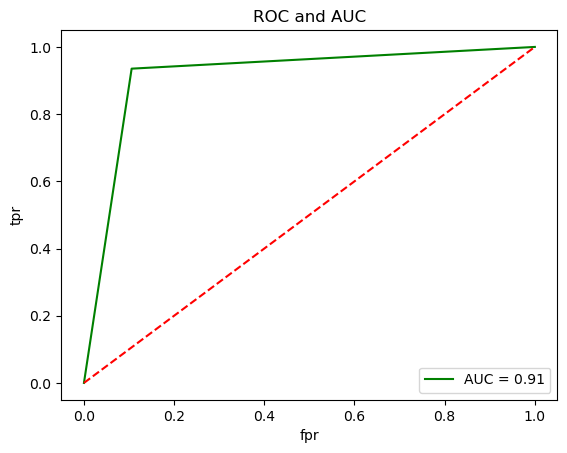

In [33]:
# AUC-ROC Curve

fpr , tpr  , threshold= roc_curve(y_test , gd.predict(X_test))
roc_auc = auc(fpr ,tpr)
plt.plot(fpr , tpr,c='green',label = 'AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1]  ,linestyle= '--'  ,c='red')
plt.legend(loc = 'lower right')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC and AUC")